# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
## Simple Policy Search
# Format of training simply copied from above (with come changes)
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

#
num_episodes = 1000

# Logging rewards over time
labels = ['episode', 'reward']

# Other information that might be good to log
# labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
#           'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
#           'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']

# Only record every 100th episode
results = {x : [] for x in labels}


# Target is to go to 10u high
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    #
    episode_reward = 0
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        #
        episode_reward += reward
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
            
    # Log every episode
    results['episode'].append(i_episode)
    results['reward'].append(episode_reward)
    # Reset for next episode
    sys.stdout.flush()

### Using Deep Deterministic Policy Gradients (DDPG)

In [1]:
# Format of training simply copied from above (with come changes)
import sys
import numpy as np
import pandas as pd
from agents.ddpg.agent import DDPG
from task_hover10m import Task
import csv

num_episodes = 3500

# Logging rewards over time
labels = ['episode', 'reward']

# Other information that might be good to log
labels = ['episode', 'reward', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 
          'x_velocity', 'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed']

# Record every episode
results = {x : [] for x in labels}


# Target is to go to 10m high
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task)

/home/victorg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Run simulation
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        all_actions = action
        next_state, reward, done = task.step(all_actions) # same rotorspeed for each of 4 motors
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            if score >= agent.best_score:
                print("\nBEST SCORE!\n\tscore={:5.2f} time={:5.2f} z={:5.1f} v={:5.1f}".format(score, task.sim.time,task.sim.pose[2],task.sim.v[2]))
                agent.best_score = score
            print("\rEpisode = {:4d}, score = {:6.3f}, time={:5.2f}, z={:5.1f} (roll_avg20 = {:6.3f} avg = {:7.3f} best = {:6.3f})".format(
                i_episode, score, task.sim.time,task.sim.pose[2],sum(results['reward'][-20:])/20, np.mean(results['reward']), agent.best_score,), end="")  # [debug]
            break
    to_write = [i_episode, score, task.sim.time] + list(task.sim.pose) \
                + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    sys.stdout.flush()


BEST SCORE!
	score=15.63 time= 3.36 z=  0.0 v=-14.7
Episode =    1, score = 15.634, time= 3.36, z=  0.0 (roll_avg20 =  0.000 avg =     nan best = 15.634)

/home/victorg/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/victorg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode =    2, score = 14.788, time= 3.18, z=  0.0 (roll_avg20 =  0.782 avg =  15.634 best = 15.634)
BEST SCORE!
	score=17.35 time= 3.60 z=  0.0 v=-19.3
Episode =  133, score =  3.728, time= 1.80, z=  0.0 (roll_avg20 =  5.126 avg =   4.740 best = 17.346)
BEST SCORE!
	score=17.64 time= 5.04 z= 12.1 v=-19.5
Episode =  139, score = 16.552, time= 5.04, z= 25.0 (roll_avg20 =  6.496 avg =   4.837 best = 17.642)
BEST SCORE!
	score=18.38 time= 5.04 z=  6.1 v=-21.8
Episode =  270, score = 11.305, time= 5.04, z= 36.9 (roll_avg20 = 11.086 avg =   6.689 best = 18.377)
BEST SCORE!
	score=24.41 time= 5.04 z= 10.8 v= -4.9
Episode =  417, score =  5.986, time= 1.74, z=  0.0 (roll_avg20 =  5.507 avg =   6.325 best = 24.412)
BEST SCORE!
	score=25.01 time= 5.04 z=  9.3 v=  2.1
Episode = 1147, score = 17.584, time= 4.08, z=  0.0 (roll_avg20 = 10.977 avg =   5.450 best = 25.008)
BEST SCORE!
	score=27.31 time= 5.04 z=  0.0 v=-15.9
Episode = 1189, score =  9.728, time= 3.60, z=  0.0 (roll_avg20 = 12.476 avg

In [3]:
# Save to data file# Save  
import csv

filename = "data_ep{}_best{.1f}.csv".format(num_episodes,agent.best_score)
with open(filename, 'w') as datafile:
    mywriter = csv.writer(datafile)
    # Write the heading on the first line
    header = [str(l) for l in labels]
    # Each row is one episode (in order of the header) 
    mywriter.writerow(header)
    for i in range(len(results['episode'])):
        row = [str(results[l][i]) for l in labels]
        mywriter.writerow(row)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

*Below are the various plots in of to the results using a rolling average. The first plot shows the rewards and other data to convey what caused the rewards to be high or low. The next plot is just the rewards over each episode with the following plots showing various simulation information after each episode terminated.* 

In [5]:
import matplotlib.pyplot as plt
import csv

In [28]:
# Read in the data if it was produced from before
filename = 'data_ep_3500_best_31.4.csv'
with open(filename, 'r') as datafile:
    myreader = csv.reader(datafile)
    labels = next(myreader)
    # Read in the data the way it was produced
    results = {x : [] for x in labels}
    for row in myreader:
        for i,l in enumerate(labels):
            results[l].append(row[i])

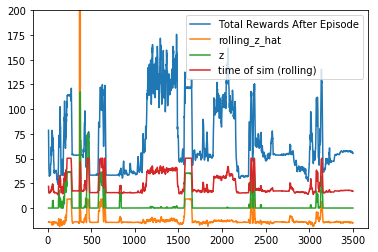

In [39]:
## Summary of most relevant values in simulation
# Number of episodes to average over for rolling mean
avg_over = 10

# Reward
rolling_mean = pd.Series(results['reward']).rolling(avg_over).mean()
plt.plot(results['episode'], rolling_mean*10, label='Total Rewards After Episode')

# Velocity
rolling_vel = pd.Series(results['z_velocity']).rolling(avg_over).mean()
plt.plot(results['episode'], rolling_vel*1, label='rolling_z_hat')

# Position
rolling_posZ = pd.Series(results['z']).rolling(avg_over).mean()
plt.plot(results['episode'], rolling_posZ*1, label='z')

#Time
rolling_time = pd.Series(results['time']).rolling(avg_over).mean()
plt.plot(results['episode'], rolling_time*10, label='time of sim (rolling)')

plt.legend()
_ = plt.ylim(-20,200)

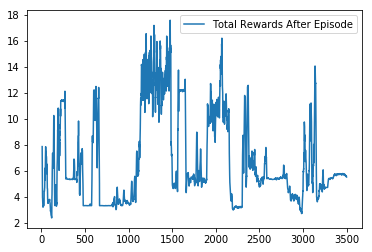

In [30]:
# Reward
rolling_mean = pd.Series(results['reward']).rolling(avg_over).mean()
plt.plot(results['episode'], rolling_mean, label='Total Rewards After Episode')

plt.legend()
_ = plt.ylim()

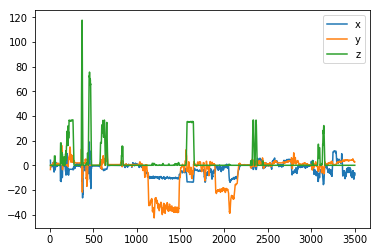

In [31]:
# Positions
rolling_posX = pd.Series(results['x']).rolling(avg_over).mean()
rolling_posY = pd.Series(results['y']).rolling(avg_over).mean()
rolling_posZ = pd.Series(results['z']).rolling(avg_over).mean()

plt.plot(results['episode'], rolling_posX, label='x')
plt.plot(results['episode'], rolling_posY, label='y')
plt.plot(results['episode'], rolling_posZ, label='z')

plt.legend()
_ = plt.ylim()

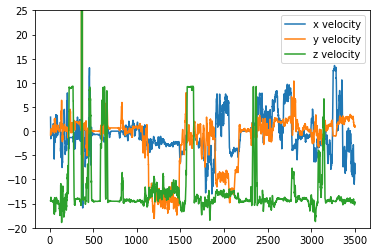

In [43]:
# Positions
rolling_velX = pd.Series(results['x_velocity']).rolling(avg_over).mean()
rolling_velY = pd.Series(results['y_velocity']).rolling(avg_over).mean()
rolling_velZ = pd.Series(results['z_velocity']).rolling(avg_over).mean()

plt.plot(results['episode'], rolling_velX, label='x velocity')
plt.plot(results['episode'], rolling_velY, label='y velocity')
plt.plot(results['episode'], rolling_velZ, label='z velocity')

plt.legend()
_ = plt.ylim(-20,25)

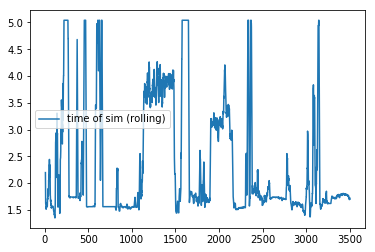

In [33]:
# Time simulation lasted
rolling_time = pd.Series(results['time']).rolling(avg_over).mean()
plt.plot(results['episode'], rolling_time, label='time of sim (rolling)')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`. How did you design the reward function?

**Answer**:

The task was the pre-defined task given, that is for the quadcopter to maintain an altitude of 10m off the ground at its initial position (x=0, y=0, z=0) and maintain that position. I renamed the file to `task_hover10m.py` to better distinguish the task.

The reward function went through many different iterations. I settled on breaking up the reward into four parts which were then scaled relative to one another and then summed as one reward.

- **x & y position from target**
> This was simply the sum of the absolute differences from the target in x & y wrapped in *tanh()* to keep this part of the reward between -1 & 1. The scaling was smaller compared to the rest of the reward parts since this goal (keeping the quadcopter above the xy-plane's origin) was relatively easy. I also didn't want the reward to be overpowered by just this (simple) goal since the most interesting actions for this task occur in the z direction.
- **z position from target**
> The z position reward was more complicated and was a mathematical equation dependent only on z position. This equation was wrapped inside of *tanh()* again to limit the reward value. The equation was meant to ensure that values near the target were rewarded and that positions too low or too high were punished. I found that punishing values that fell just below the target worked well since it prevented the quadcopter from crashing. At first I used just the equation (no *tanh*) to punish low positions harshly (see picture below) and gradually punishing high positions, but I found that it was difficult to scale this in relation to the other reward parts since the reward value could fall approximately between -20 & 0.3.
![Just the equation for z position reward](images/zposReward_Equation.png)
I ended up wrapping the equation with *tanh()* to make scaling easier but still encouraging values near the target of 10m (see below picture). This lost the steepness of the low position values, but it worked fine since values above about 9 could get a positive reward. It should be noted that the reward value now ranged from approximately -1 to 0.3
![Equation for z position reward with tanh applied](images/zposReward_tanhEquation.png)
- **z velocity (tied to z position)**
> The reward for the z velocity was dependent on both the quadcopter's velocity in z and the the quadcopter's position in z. Again *tanh* was used to limit the reward to be between -1 & 1. Using both the z velocity and z position made sense here since there were different velocity needs depending on the quadcopter's position in relation to the target. When the quadcopter was below the target then a positive velocity was needed and vice versa. It also made sense to encourage higher positive velocities the further the quadcopter was below the target and more negative velocities the further above the quadcopter was above the target so that the quadcopter would be moving towards the target. Thus the equation involved multiplying the velocity by the difference of the z position from the target (positive when below target; negative when above target). This meant the overall reward's absolute was largest when the velocity was large and the quadcopter was far from the target. The overall reward was also negative when moving away from the target and positive when moving towards the target.
- **constant (to encourage simulation to run longer)**
> Lastly, a constant was added to the final reward to encourage the simulation to run out the simulation's time of 5s and not terminate early. This discouraged leaving the simulation's bounds but in practice this reward mostly counteracted the quadcopter from crashing (z=0) and terminating before the full time was expended. Previous attempts at making a time-based reward were made but ultimately became overcomplicated with very little success. When the time-based reward was increased as the simulation ran longer, the agent would focus mostly on not crashing/reaching boundaries with little concern about being near the target. When the opposite was implemented (decreasing the reward over time), the quadcopter tended to crash more. Attempts were made to scale the time-based reward on position and/or velocity but this ultimately was just creating the overall reward function. Ultimately a constant part of the reward was the most successful without introducing more complexities.  

From these four parts, the overall reward was created from scaling the parts and then summing. The constant used for the time-based reward was about 45% of the overall reward and the x & y position reward was scaled to be about 10% of the overall reward, and the z position reward and the z velocity reward were each about 25% of the overall reward. The overall reward was then scaled down to 100th its value to prevent large values at the end of the simulation; overall rewards usually fell between 0 & 20.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

At first I had tried using DQN but found splitting the state space to take too much memory for my machine. I ended up using the DDPG algorithm since it seemed promising for the continuous space. I found that it did well in implimenting and its success seemed tied most closely to the reward function.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The agent had a difficult time finding to get past a certain point. It would keep doing nearly the same thing and then after a long period, it would do something different. However, this usually was a poor choice and it would perform badly.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was determining what was causing the quadcopter to not do well at its task. It took a lot of trial and error to determine whether the biggest effects were because of my neural networks, hyperparameters, or reward function. I finally determined that the quadcopter was most dependent on the reward function. There is still a heavy importance to the actual algorithm and hyperparameters, but if I poorly define a reward function no system (no matter how sophisticated) will be able to learn from the reward function.

I thought it was interesting how difficult it was to get the agent to learn the reward function. I had originally thought that the agent would "learn" the reward function (maximize rewards) regardless if the reward function was meaningful or not. However looking back at my work, it makes sense that the agent didn't necessarily learn whatever reward function I gave it. I know think of an analogy of a "dumb" agent not being able to learn a complex task to a dog learning to speak English. You can try your best in giving a treat/reward to the dog so it can learn language but some skills are literally impossible unless you have a "smarter" dog.